# Ethan Drake - Midterm Project

This project aims to predict future electricity usage in Vartan Gregorian Quad (VGQ) using two datasets:
1) 15-minute interval data from VGQ showing electricity usage (in kWh) between Jan. 1, 2018 and Sep. 30, 2023.
2) Hourly interval weather data from NOAA showing features such as temperature, humidity, and wind speed.


## Loading in the two datasets and merging them into one

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from datetime import datetime

# read in the Electricity Data
df2 = pd.read_excel('data/VGQ2018to2023.xlsx')
df2 = df2.drop(index=0)

# read in the Weather Data
df_weather = pd.read_excel('data/RI2018to2023Weather.xlsx')

# dropping the covid period (March 13, 2020 to September 1, 2021) from both datasets
df_nocov = df2.drop(index=list(range(76961, 128019)))

df_weather_nocov = df_weather.drop(index=list(range(18852, 31553)))

# creating a new dataframe for the electricity data that turns the 15-minute intervals into 1-hour intervals
df_new = []
for i in range(3, len(df_nocov), 4):
    row_to_append = df_nocov.iloc[[i]].values[0]
    # print(row_to_append)
    # print(df_nocov['Net kWh'][(i-3):(i)].values) 
    row_to_append[1] = float(row_to_append[1]) + sum(float(j) for j in df_nocov['Net kWh'][(i-3):(i)].values)
    df_new.append(row_to_append)
#print(df_new)
df_new = pd.DataFrame(df_new, columns=df_nocov.columns)
#df_new

# retrieving just the hourly weather reports (eliminating the daily summaries)
df_weather = df_weather[(df_weather['SOURCE']==7) & (df_weather['DATE'].str.contains(':51:00'))].copy()
df_weather = df_weather.reset_index()

# merge the two datasets (which are now in excel format and saved in the repo)
weather_data = pd.read_excel('data/hourlyweather.xlsx')
electricity_data = pd.read_excel('data/VGQdata.xlsx')

# the merged data will only keep rows for which there is both a weather recording and an electricity recording
merged_data = pd.merge(electricity_data, weather_data, left_on='DATE2', right_on='DATE', how='inner')
merged_df = pd.DataFrame(merged_data)

In [2]:
# read in the new merged excel file
df = pd.read_excel('data/ProjectDataset.xlsx', parse_dates=['DATE'])

# adding a categorical feature to the dataset that indicates \
# whether the dorm is open to students (based on Brown's academic calendar)
df['timestamp_server_local'] = pd.to_datetime(df['timestamp_server_local'])

# Function to determine if the dorm is open or not
def is_dorm_open(date):
    if (date >= pd.to_datetime('2018-01-24') and date <= pd.to_datetime('2018-05-18')) or \
       (date >= pd.to_datetime('2018-06-24') and date <= pd.to_datetime('2018-08-11')) or \
       (date >= pd.to_datetime('2018-09-01') and date <= pd.to_datetime('2018-12-21')) or \
       (date >= pd.to_datetime('2019-01-23') and date <= pd.to_datetime('2019-05-17')) or \
       (date >= pd.to_datetime('2019-06-23') and date <= pd.to_datetime('2019-08-10')) or \
       (date >= pd.to_datetime('2019-08-31') and date <= pd.to_datetime('2019-12-21')) or \
       (date >= pd.to_datetime('2020-01-22') and date <= pd.to_datetime('2020-03-13')) or \
       (date >= pd.to_datetime('2021-09-02') and date <= pd.to_datetime('2021-12-21')) or \
       (date >= pd.to_datetime('2022-01-26') and date <= pd.to_datetime('2022-05-20')) or \
       (date >= pd.to_datetime('2022-09-01') and date <= pd.to_datetime('2022-12-21')) or \
       (date >= pd.to_datetime('2023-01-25') and date <= pd.to_datetime('2023-05-19')) or \
       (date >= pd.to_datetime('2023-06-18') and date <= pd.to_datetime('2023-08-05')) or \
       (date >= pd.to_datetime('2023-08-31')):
        return 1  
    else:
        return 0

# Create a new column 'open_to_students' in the dataframe and add the values
df['open_to_students'] = df['timestamp_server_local'].apply(is_dorm_open)

# set index to the date
df.set_index('DATE', inplace=True)

# drop some unwanted columns
df = df.drop(columns=['fiscal_year', 'date', 'source_name'])

## Exploratory Data Analysis (EDA)

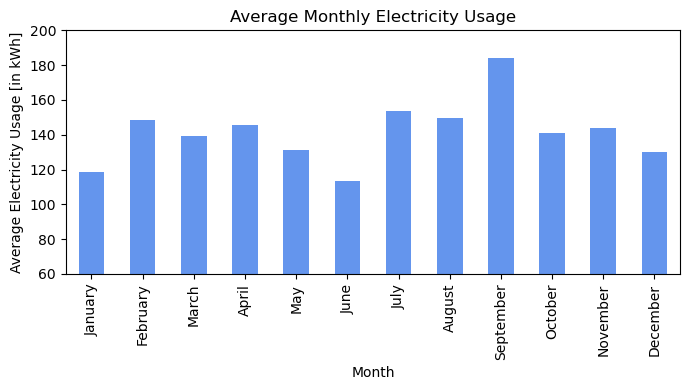

In [3]:
# histogram of average monthly electricity usage
correct_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

monthly_avg_usage = df.groupby('month')['Net kWh'].mean().reindex(correct_order)

plt.figure(figsize=(7,4))

monthly_avg_usage.plot.bar(color='cornflowerblue')
plt.ylim(60, 200)
plt.xlabel('Month')
plt.ylabel('Average Electricity Usage [in kWh]')
plt.title('Average Monthly Electricity Usage')
plt.tight_layout()
plt.show()


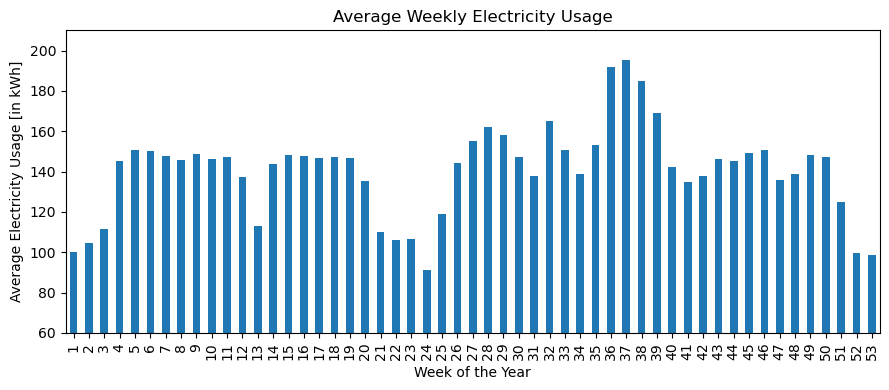

In [4]:
# histogram of average monthly electricity usage
weekly_avg_usage = df.groupby('week')['Net kWh'].mean()

plt.figure(figsize=(9,4))

weekly_avg_usage.plot.bar()
plt.ylim(60, 210)
plt.xlabel('Week of the Year')
plt.ylabel('Average Electricity Usage [in kWh]')
plt.title('Average Weekly Electricity Usage')
plt.tight_layout()
plt.show()

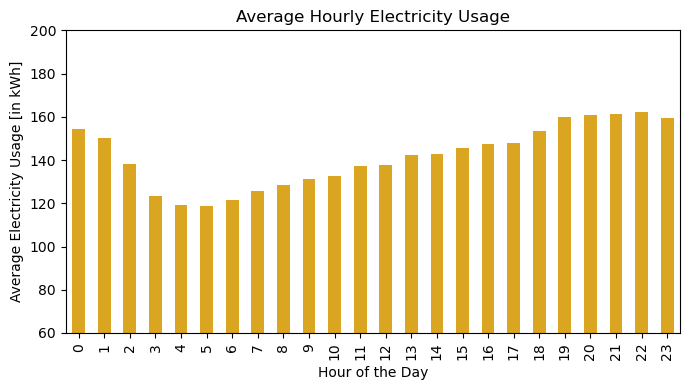

In [5]:
# histogram of average monthly electricity usage
hourly_avg_usage = df.groupby('hour')['Net kWh'].mean()

plt.figure(figsize=(7,4))

hourly_avg_usage.plot.bar(color='goldenrod')
plt.ylim(60, 200)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Electricity Usage [in kWh]')
plt.title('Average Hourly Electricity Usage')
plt.tight_layout()
plt.show()

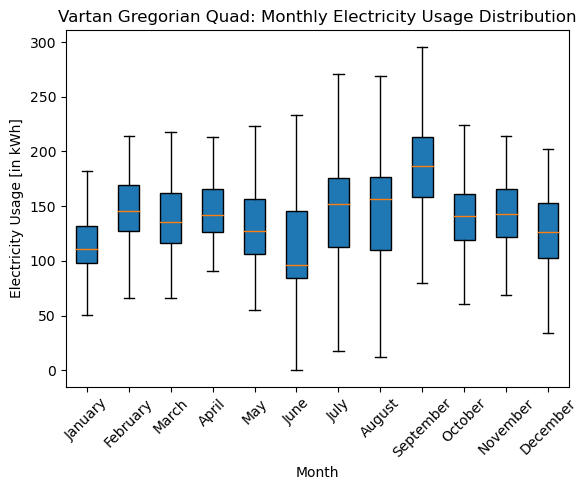

In [6]:
# box plot of monthly electricity usage

correct_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

monthly_data = [df[df['month'] == month]['Net kWh'] for month in correct_order]

plt.figure(figsize=(6, 5))

# Creating a box plot for each month
plt.boxplot(monthly_data, vert=True, patch_artist=True, showfliers=False)
plt.xticks(range(1, len(correct_order) + 1), correct_order, rotation=45)
plt.xlabel('Month')
plt.ylabel('Electricity Usage [in kWh]')
plt.title('Vartan Gregorian Quad: Monthly Electricity Usage Distribution')
plt.tight_layout()
plt.show()

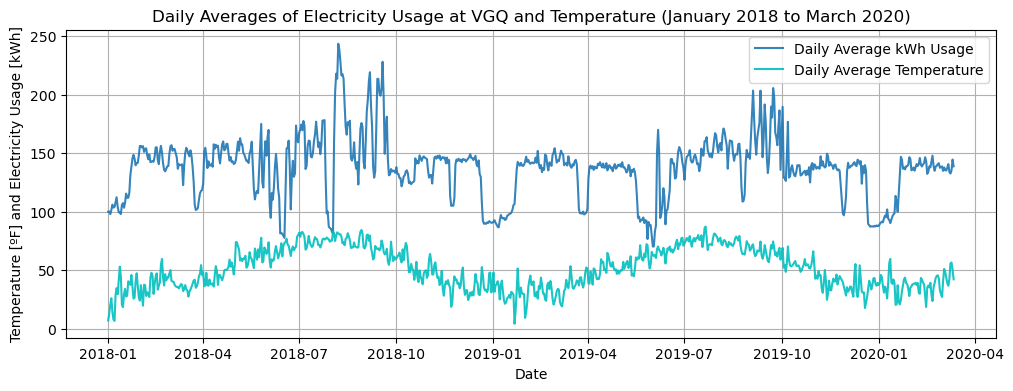

In [7]:
# Plot showing daily averages of electricity usage and temperature over time (pre-covid period) 
df['timestamp_server_local'] = pd.to_datetime(df['timestamp_server_local'])

filtered_data = df[df['timestamp_server_local'] <= '2020-03-13']

daily_averages = filtered_data.groupby(filtered_data['timestamp_server_local'].dt.date).agg({
    'HourlyDryBulbTemperature': 'mean',
    'Net kWh': 'mean'
})

plt.figure(figsize=(12, 4))
plt.plot(daily_averages.index, daily_averages['Net kWh'], alpha=0.9, label='Daily Net kWh')
plt.plot(daily_averages.index, daily_averages['HourlyDryBulbTemperature'], color='c', alpha=0.9, label='Daily Temperature')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Temperature [ºF] and Electricity Usage [kWh]')
plt.legend(labels=('Daily Average kWh Usage', 'Daily Average Temperature'))
plt.title('Daily Averages of Electricity Usage at VGQ and Temperature (January 2018 to March 2020)')
plt.show()

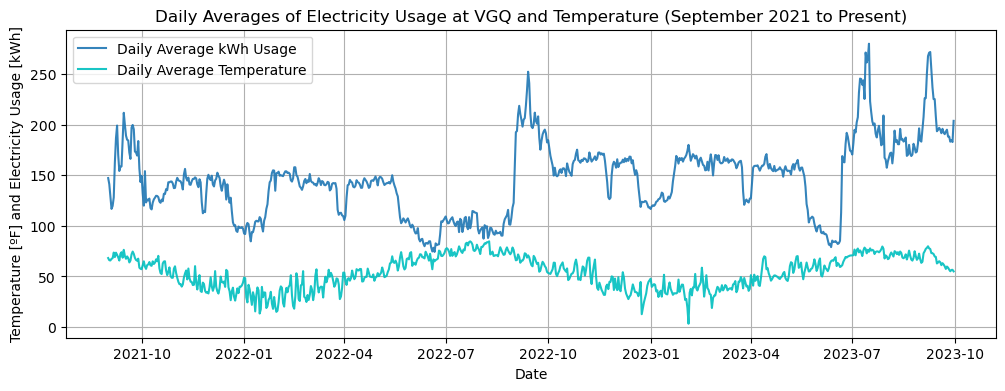

In [8]:
# Plot showing daily averages of electricity usage and temperature over time (post-covid period) 

filtered_data = df[(df['timestamp_server_local'] >= '2021-08-31') & (df['timestamp_server_local']<='2023-10-01')]

daily_averages = filtered_data.groupby(filtered_data['timestamp_server_local'].dt.date).agg({
    'HourlyDryBulbTemperature': 'mean',
    'Net kWh': 'mean'
})

plt.figure(figsize=(12, 4))
plt.plot(daily_averages.index, daily_averages['Net kWh'], alpha=0.9, label='Daily Net kWh')
plt.plot(daily_averages.index, daily_averages['HourlyDryBulbTemperature'], color='c', alpha=0.9, label='Daily Temperature')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Temperature [ºF] and Electricity Usage [kWh]')
plt.legend(labels=('Daily Average kWh Usage', 'Daily Average Temperature'))
plt.title('Daily Averages of Electricity Usage at VGQ and Temperature (September 2021 to Present)')
plt.show()

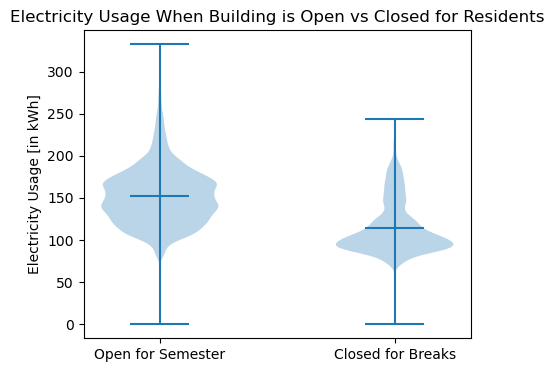

In [9]:
dataset = [df[df['open_to_students']==1]['Net kWh'].values,
           df[df['open_to_students']==0]['Net kWh'].values]
           
plt.figure(figsize=(5,4))

plt.violinplot(dataset=dataset, showmeans=True)
plt.xticks([1,2],['Open for Semester', 'Closed for Breaks'])
plt.ylabel('Electricity Usage [in kWh]')
plt.title('Electricity Usage When Building is Open vs Closed for Residents')
plt.show()

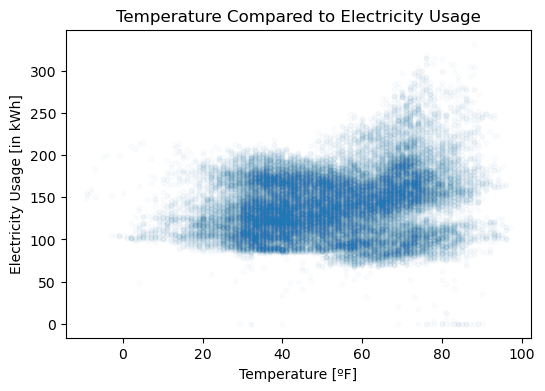

In [10]:
# Electricity Usage Compared to Temperature
plt.figure(figsize=(6,4))

plt.scatter(df['HourlyDryBulbTemperature'].values, df['Net kWh'], alpha=0.02, s=10)
plt.xlabel('Temperature [ºF]')
plt.ylabel('Electricity Usage [in kWh]')
plt.title('Temperature Compared to Electricity Usage')
plt.show()

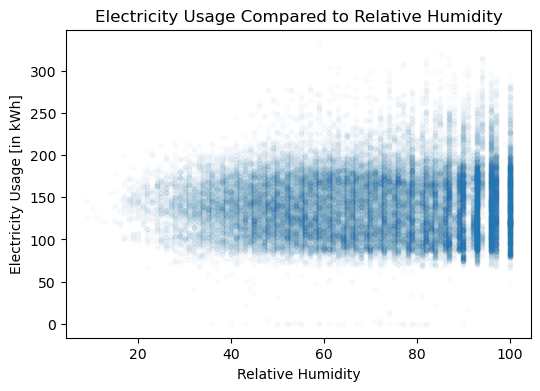

In [11]:
# Electricity Usage Compared to Humidity
plt.figure(figsize=(6,4))

plt.scatter(df['HourlyRelativeHumidity'].values, df['Net kWh'], alpha=0.02, s=10)
plt.xlabel('Relative Humidity')
plt.ylabel('Electricity Usage [in kWh]')
plt.title('Electricity Usage Compared to Relative Humidity')
plt.show()

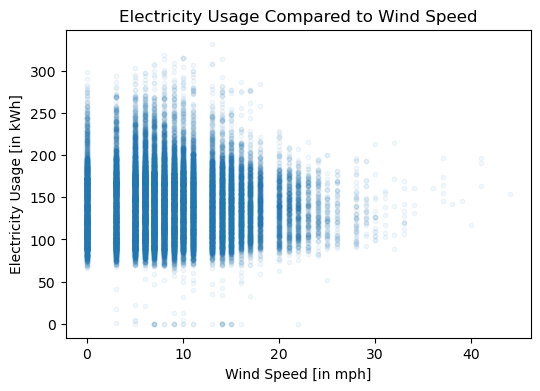

In [12]:
# Electricity Usage Compared to Wind Speed
plt.figure(figsize=(6,4))

plt.scatter(df['HourlyWindSpeed'].values, df['Net kWh'], alpha=0.05, s=10)
plt.xlabel('Wind Speed [in mph]')
plt.ylabel('Electricity Usage [in kWh]')
plt.title('Electricity Usage Compared to Wind Speed')
plt.show()

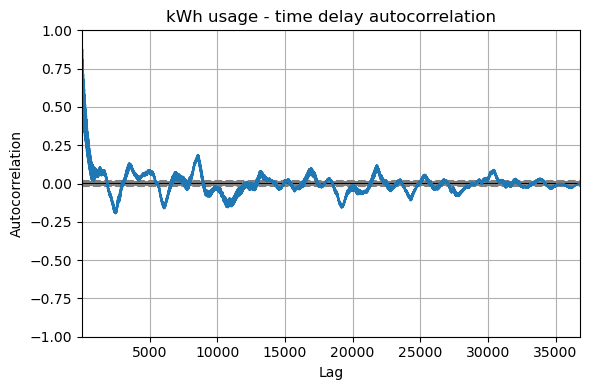

In [13]:
# time delay autocorrelation
plt.figure(figsize=(6,4))

pd.plotting.autocorrelation_plot(df['Net kWh'])
plt.title('kWh usage - time delay autocorrelation')
plt.tight_layout()
plt.show()

## Splitting the Data

In [14]:
# For now, I am dropping the rows with missing values.
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)

(36807, 15)
(35830, 15)


In [15]:
# first step: separate the test set
from sklearn.model_selection import train_test_split 
# Arguments:
y = df_r['Net kWh']
X = df_r.loc[:, df.columns != 'Net kWh']

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size=0.1,shuffle=False)

# Output Test
print('Size of the Other (Train+Val) Set:')
print(X_other.shape[0]/(X_other.shape[0] + X_test.shape[0]))

print('Size of the Test Set:')
print(X_test.shape[0]/(X_other.shape[0] + X_test.shape[0]))

Size of the Other (Train+Val) Set:
0.9
Size of the Test Set:
0.1


In [16]:
# second step: perform a Time Series Split
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)

# Time Series Split
fold = 0
for train_index, val_index in tss.split(X_other,y_other):
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]
    fold = fold + 1
    print('Fold #', fold, 'X_train:', X_train.shape, '| X_val:', X_val.shape)

Fold # 1 X_train: (5377, 14) | X_val: (5374, 14)
Fold # 2 X_train: (10751, 14) | X_val: (5374, 14)
Fold # 3 X_train: (16125, 14) | X_val: (5374, 14)
Fold # 4 X_train: (21499, 14) | X_val: (5374, 14)
Fold # 5 X_train: (26873, 14) | X_val: (5374, 14)


## Preprocessing the Data

In [17]:
# Identifying # of Missing Values
missing_per_ftr = df.isnull().sum(axis=0)
print('# of missing values in features:')
print(missing_per_ftr[missing_per_ftr > 0])

# Data Types of Features with Missing Values
# print('data types: ')
#print(df[missing_per_ftr[missing_per_ftr > 0].index].dtypes)

# Percent of Rows with Missing Values
total_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:')
print(total_missing)

# of missing values in features:
HourlyDewPointTemperature     72
HourlyDryBulbTemperature      22
HourlyRelativeHumidity        72
HourlyVisibility              18
HourlyWetBulbTemperature     150
HourlyWindDirection          842
HourlyWindSpeed               47
dtype: int64
fraction of points with missing values:
0.02654386393892466


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# One Hot Encoder for Categorical Features and Standard Scaler for Continuous Features
onehot_ftrs = ['calendar_year','month','open_to_students']
std_ftrs = ['week','hour', 'minute', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', \
           'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed']

# Collect the two encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

# Fit the Training Set and Transform the Training, Validation, and Test Sets
preprocess = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = preprocess.fit_transform(X_train)
X_val_prep = preprocess.transform(X_val)
X_test_prep = preprocess.transform(X_test)

print('Initial Data Shape:', X_train.shape)
print('Post-Transform Data Shape:', X_train_prep.shape)
#print(X_train_prep)

Initial Data Shape: (26873, 14)
Post-Transform Data Shape: (26873, 29)


In [19]:
df

,Net kWh,timestamp_server_local,calendar_year,month,week,hour,minute,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,open_to_students
DATE,,,,,,,,,,,,,,,
2018-01-01 01:00:00,99.687500,2018-01-01 01:00:00,2018,January,1,1,0,-7.0,4.0,60.0,10.0,2.0,310.0,10.0,0
2018-01-01 02:00:00,101.187500,2018-01-01 02:00:00,2018,January,1,2,0,-8.0,4.0,57.0,10.0,2.0,310.0,11.0,0
2018-01-01 03:00:00,101.937500,2018-01-01 03:00:00,2018,January,1,3,0,-8.0,3.0,60.0,10.0,1.0,320.0,10.0,0
2018-01-01 04:00:00,101.812500,2018-01-01 04:00:00,2018,January,1,4,0,-8.0,2.0,63.0,10.0,1.0,320.0,10.0,0
2018-01-01 05:00:00,102.000000,2018-01-01 05:00:00,2018,January,1,5,0,-8.0,2.0,63.0,10.0,1.0,320.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29 20:00:00,220.687500,2023-09-29 20:00:00,2023,September,39,20,0,55.0,56.0,97.0,8.0,55.0,10.0,10.0,1
2023-09-29 21:00:00,220.531250,2023-09-29 21:00:00,2023,September,39,21,0,54.0,55.0,96.0,7.0,54.0,360.0,10.0,1
2023-09-29 22:00:00,226.109375,2023-09-29 22:00:00,2023,September,39,22,0,54.0,55.0,96.0,3.0,54.0,10.0,13.0,1


In [20]:
df['HourlyDryBulbTemperature'].shift(2)

DATE
2018-01-01 01:00:00     NaN
2018-01-01 02:00:00     NaN
2018-01-01 03:00:00     4.0
2018-01-01 04:00:00     4.0
2018-01-01 05:00:00     3.0
                       ... 
2023-09-29 20:00:00    57.0
2023-09-29 21:00:00    56.0
2023-09-29 22:00:00    56.0
2023-09-29 23:00:00    55.0
2023-09-30 00:00:00    55.0
Name: HourlyDryBulbTemperature, Length: 36807, dtype: float64

In [22]:
df.to_csv('testdata.csv', index=False)